# MLBD Project : Simplified Human Activity Recognition w/Smartphone

1. Feature selection
2. Model
3. Prediction

X_train : (2418, 561)
X_test: (1191, 561)
X_train : (2418,)
y_test: (1191,)
5 0


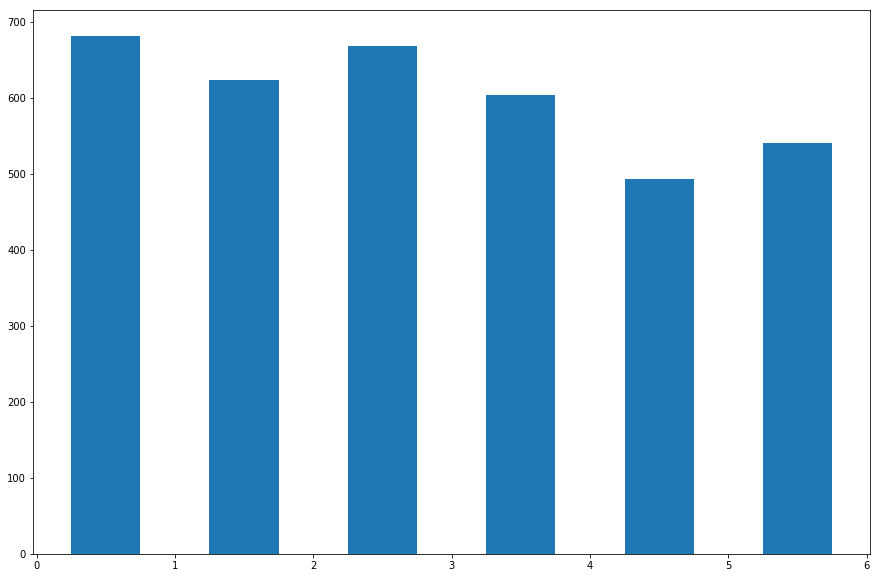

In [77]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data_train = pd.read_csv("dataset/train.csv")
# data_test = pd.read_csv("dataset/test.csv")

X = data_train.values[:,2:]
y_label = data_train.values[:,1]

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"X_train : {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_train : {y_train.shape}")
print(f"y_test: {y_test.shape}")

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

print(y.max(), y.min())
    
plt.figure(figsize=(15,10))
bins = range(7)
plt.hist(y, bins=bins,rwidth=0.5)
bins_labels(bins)
plt.show()

## Feature selection



### VarianceThreshold

On supprime les features avec une variance faible. Ici on garde que les features avec une variance supérieure à 80%

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_selected = sel.fit_transform(X_train)
indices = sel.get_support(indices=True)
print(X_train_selected.shape)

## Training

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)
params = {"solver":["lbfgs"], "alpha":[1e-5, 1e-4,1e-3,1e-6], "hidden_layer_sizes":[(5,10)], "max_iter":[200,250,300]}
clf = GridSearchCV(mlpc, params, cv=5)

clf.fit(X_train_selected, y_train)
# clf.fit(X_train_, y_train)

y_predicted = clf.predict(X_test[:,indices])
# y_predicted = clf.predict(X_test)
score = accuracy_score(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
print(score)
print(cm)